In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv


In [2]:
# How many students are in the dataset? - 1100 students
file = pd.read_csv('/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv')
file = pd.DataFrame(file)
file

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [3]:
#What is the average anxiety level of students in the dataset? - 11.06
avg_anx_level = file['anxiety_level'].mean().round(2)
avg_anx_level

11.06

In [4]:
#How many students have reported a history of mental health issues? - 542 students
mental_issue = file[file['mental_health_history'] == 1]
mental_issue_count = mental_issue['mental_health_history'].count()
mental_issue_count

542

In [5]:
#How many students have a self-esteem level below the average? - 507
avg_esteem_level = file['self_esteem'].mean().round(2)
below_avg_esteem = file[file['self_esteem'] < 17.78]
below_avg_esteem_count = below_avg_esteem['self_esteem'].count()
below_avg_esteem_count

507

In [6]:
#What percentage of students have reported experiencing depression? - 96%
dep = file[file['depression'] != 0]
no_dep = file[file['depression'] == 0]
dep_count = dep['depression'].count()
no_dep_count = no_dep['depression'].count()
perc_dep = (dep_count / 1100) * 100
perc_dep

96.0

In [7]:
#How many students experience headaches frequently? - 1068 students
head_freq = file[file['headache'] != 0]
head_freq_count = head_freq['headache'].count()
head_freq_count

1068

In [8]:
#What is the average blood pressure reading among the students? - 2.18
avg_blood_press = file['blood_pressure'].mean().round(2)
avg_blood_press

2.18

In [9]:
#How many students rate their sleep quality as poor? - 550 (Assuming anything below 3 is poor)
poor_sleep = file[file['sleep_quality'] < 3]
poor_sleep_count = poor_sleep['sleep_quality'].count()
poor_sleep_count

550

In [10]:
#How many students live in conditions with high noise levels? - 274 (Assuming anything above 3 is high)
high_noise = file[file['noise_level'] > 3]
high_noise_count = high_noise['noise_level'].count()
high_noise_count

274

In [11]:
#What percentage of students feel unsafe in their living conditions? - 551 
poor_living = file[file['living_conditions'] < 3]
poor_living_count = poor_living['living_conditions'].count()
poor_living_count

551

In [12]:
#How many students have reported not having their basic needs met? - 548
no_basic_met = file[file['basic_needs'] < 3]
no_basic_count = no_basic_met['basic_needs'].count()
no_basic_count

548

In [13]:
#How many students rate their academic performance as below average? - 561
aca_below = file[file['academic_performance'] < 3]
aca_below_count = aca_below['academic_performance'].count()
aca_below_count

561

In [14]:
#What is the average study load reported by students? - 2.62
study_load_avg = file['study_load'].mean().round(2)
study_load_avg

2.62

In [15]:
#How many students have concerns about their future careers? - 371 students
future_concern = file[file['future_career_concerns'] > 3]
future_concern_count = future_concern['future_career_concerns'].count()
future_concern_count

371

In [16]:
#How many students feel they have strong social support? - 458 students 
social_supp = file[file['social_support'] == 3]
social_count = social_supp['social_support'].count()
social_count

458

In [17]:
#What percentage of students have experienced bullying? - 96.45%
bully = file[file['bullying'] != 0]
bully_count = bully['bullying'].count()
bully_count_perc = ((bully_count / 1100) * 100).round(2)
bully_count_perc

96.45

In [18]:
#How many students participate in extracurricular activities? - 1066 (Assuming 1 and higher is participating in an activity)
extra_act = file[file['extracurricular_activities'] > 0]
extra_act_count = extra_act['extracurricular_activities'].count()
extra_act_count

1066

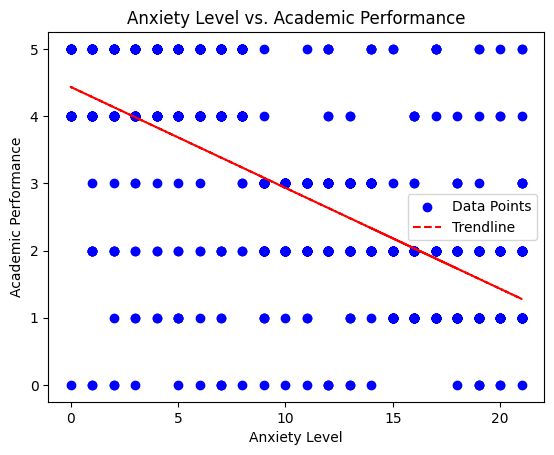

In [19]:
#Is there a correlation between anxiety level and academic performance? - Higher anxiety levels tends to result in lower academic performance
anx_aca_corr = file[['anxiety_level', 'academic_performance']]

import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(anx_aca_corr['anxiety_level'], anx_aca_corr['academic_performance'], marker='o', color='b', label='Data Points')

# Add labels and title
plt.xlabel('Anxiety Level')
plt.ylabel('Academic Performance')
plt.title('Anxiety Level vs. Academic Performance')

# Add a trendline (optional)
z = np.polyfit(anx_aca_corr['anxiety_level'], anx_aca_corr['academic_performance'], 1)
p = np.poly1d(z)
plt.plot(anx_aca_corr['anxiety_level'], p(anx_aca_corr['anxiety_level']), "r--", label='Trendline')

# Show the legend
plt.legend()

# Show the plot
plt.show()

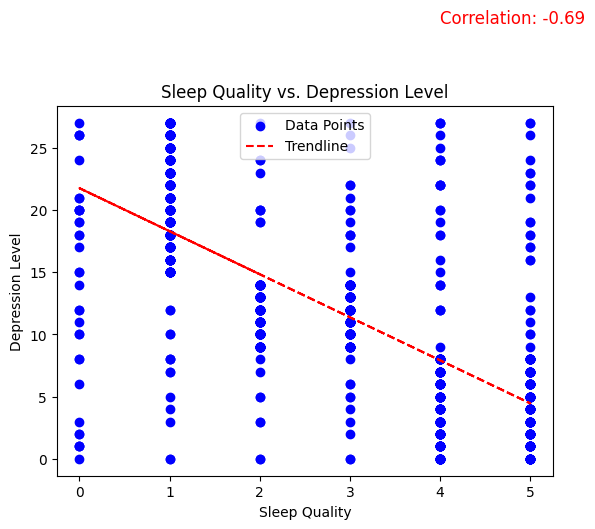

In [20]:
#Do students with poor sleep quality also report higher levels of depression? - The lower the depression level the higher the sleep quality
import scipy.stats

sleep_dep_levels = file[['sleep_quality', 'depression']]
plt.scatter(sleep_dep_levels['sleep_quality'], sleep_dep_levels['depression'], marker='o', color='b', label='Data Points')

# Add labels and title
plt.xlabel('Sleep Quality')
plt.ylabel('Depression Level')
plt.title('Sleep Quality vs. Depression Level')

# Add a regression line
z = np.polyfit(sleep_dep_levels['sleep_quality'], sleep_dep_levels['depression'], 1)
p = np.poly1d(z)
plt.plot(sleep_dep_levels['sleep_quality'], p(sleep_dep_levels['sleep_quality']), "r--", label='Trendline')

# Calculate the Pearson correlation coefficient
correlation_coefficient, _ = scipy.stats.pearsonr(sleep_dep_levels['sleep_quality'], sleep_dep_levels['depression'])
plt.text(4, 35, f'Correlation: {correlation_coefficient:.2f}', fontsize=12, color='r')

# Show the legend
plt.legend()

# Show the plot
plt.show()

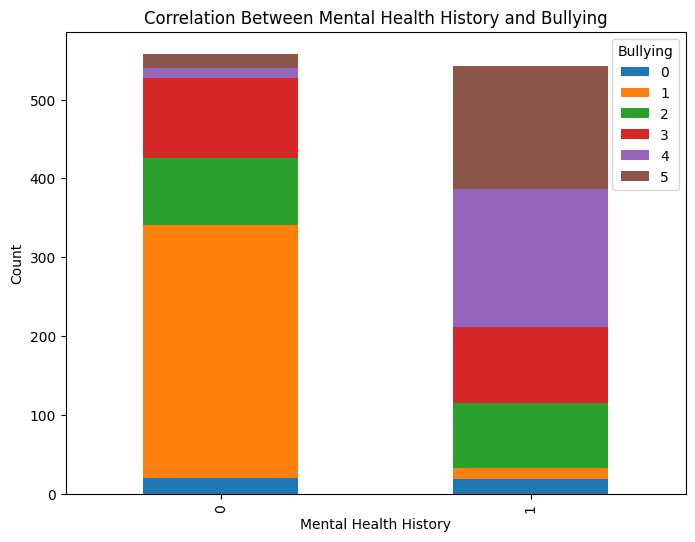

In [21]:
#Are students who experience bullying more likely to have a history of mental health issues? - So with this chart you can see people with no mental health issues (0) had over half the count with a level of 1 bullying. Where as people with meantal health issues had majoirty of bullying levels 4 and 5. 
bully_mental = file[['mental_health_history', 'bullying']]
cross_table = pd.crosstab(bully_mental['mental_health_history'], bully_mental['bullying'])

# Create a grouped bar chart
cross_table.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add labels and title
plt.xlabel('Mental Health History')
plt.ylabel('Count')
plt.title('Correlation Between Mental Health History and Bullying')

# Show the plot
plt.legend(title='Bullying', loc='upper right')
plt.show()